![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 2. Preparación de datos

Una vez entendido el contexto de la problemática y realizado el análisis exploratorio de datos de acuerdo con la descripción del dataset y la información entregada al equipo en la fase anterior, se comparte un paso a paso que deberá ser diligenciado por el equipo de ciencia de datos asignado para esta tarea con el fin de guiar el proceso de EDA y preparación de datos, lo cual es crucial antes de desarollar el modelamiento. 

El estudio tiene como objetivo la clasificación de un paciente como hospitalizado o no hospitalizado.




Carguen la base de datos y revisen el tipo de cada columna del dataset. Si es necesario realicen conversiones de tipos de datos. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import openpyxl 

In [2]:
datos= pd.read_excel('BBDD_Hospitalización.xlsx')
datos.head(5)

/usr/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0


Eliminen variables si es que consideran irrelevantes, sustentando adecuadamente por qué.

* Las variables 'TIPO DE CULTIVO' y 'PATRÓN DE RESISTENCIA' se consideraron irrelevantes, ya que su contribución a la pregunta resulta limitada y no aporta información significativa al análisis. Además, las columnas 'DIAS HOSPITALIZACION MQ' y 'DIAS HOSPITALIZACIÓN UPC' se excluyeron debido a que, en este contexto particular, la duración de la hospitalización no es un factor relevante para la pregunta que estamos tratando de responder.

In [3]:
variables_a_eliminar = ['TIPO DE CULTIVO','PATRON DE RESISTENCIA','DIAS HOSPITALIZACION MQ', 'DIAS HOSPITALIZACIÓN UPC'] 
variables = datos.drop(variables_a_eliminar, axis=1)


In [4]:
variables.head(5)

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,AGENTE AISLADO,HOSPITALIZACION
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,SI
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,SI
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,E.COLI,SI
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,SI
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,E.COLI,SI


Revisen la distribución estadística para el caso de las variables numéricas. ¿Qué gráficos permiten realizar un estudio exploratorio de la distribución? ¿Hay datos atípicos?

* He realizado  un conjunto de análisis y visualizaciones que me ayudarán a comprender cómo están distribuidos los valores en las variables     numéricas de el conjunto de datos. Esto es fundamental para obtener una comprensión más profunda y puede ayudarme a identificar patrones, tendencias y posibles valores atípicos.

In [5]:
# Lista de las columnas numéricas
columnas_numericas = ['EDAD', 'PSA', 'NUMERO DE MUESTRAS TOMADAS']

for columna in columnas_numericas:
    estadisticas = datos[columna].describe()
    print(f'Estadísticas para {columna}:\n{estadisticas}\n')

Estadísticas para EDAD:
count    568.000000
mean      63.882042
std        9.281517
min       39.000000
25%       59.000000
50%       64.000000
75%       69.000000
max      151.000000
Name: EDAD, dtype: float64

Estadísticas para PSA:
count    564.000000
mean      13.271401
std       15.668966
min        0.600000
25%        5.600000
50%        8.000000
75%       15.000000
max      100.000000
Name: PSA, dtype: float64

Estadísticas para NUMERO DE MUESTRAS TOMADAS:
count    568.000000
mean      12.996479
std        3.921180
min        4.000000
25%       12.000000
50%       12.000000
75%       12.000000
max       24.000000
Name: NUMERO DE MUESTRAS TOMADAS, dtype: float64



### Momento para Graficar

Text(0.5, 1.0, 'Distribución de Edad')

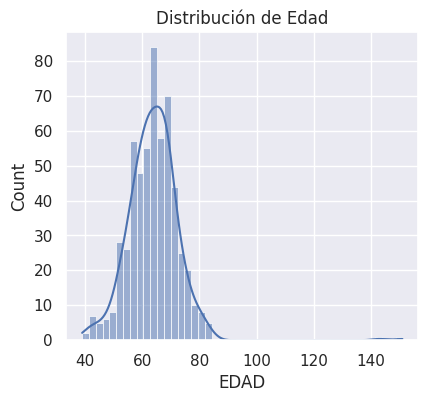

In [6]:
# Histograma de la edad
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(datos['EDAD'], kde=True)
plt.title('Distribución de Edad') 

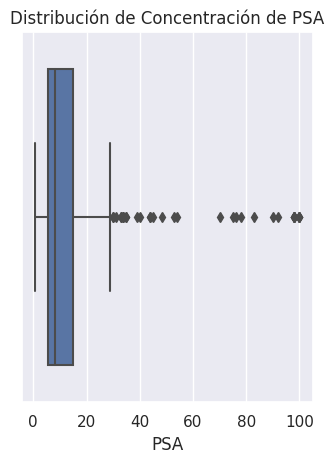

In [7]:
# Gráfico de caja de la concentración de PSA
plt.subplot(1, 2, 2)
sns.boxplot(x=datos['PSA'])
plt.title('Distribución de Concentración de PSA')

plt.tight_layout()
plt.show() 

Text(0.5, 1.0, 'Distribución de Muestras Tomadas')

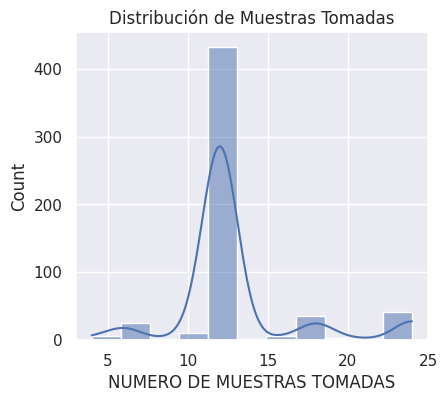

In [8]:
# Histograma Número de muestras tomadas
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(datos['NUMERO DE MUESTRAS TOMADAS'], kde=True)
plt.title('Distribución de Muestras Tomadas')

Si encontraron datos atípicos, ¿Imputarán o eliminarán los valores? Sustentar.

In [9]:
# Elimino la columna 'NUMERO DE MUESTRAS TOMADAS', ya que no proporciona información relevante.
datos = datos.drop(['NUMERO DE MUESTRAS TOMADAS'], axis=1)

#Para los valores atipicos de la columna 'PSA' he realizado estas estrategias que se basa en el rango intercuartil (IQR).

Q1 = datos['PSA'].quantile(0.25)
Q3 = datos['PSA'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

datos_sin_atipicos = datos[(datos['PSA'] >= limite_inferior) & (datos['PSA'] <= limite_superior)]


Text(0.5, 1.0, 'PSA (después de eliminar atípicos)')

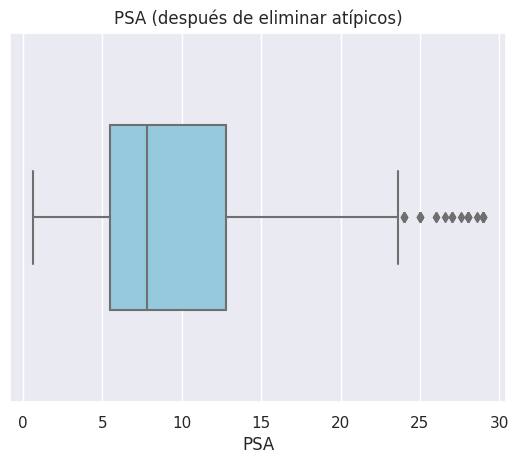

In [10]:
#Grafico la columna 'PS' para verificar que los valores atípicos se han eliminado.
sns.boxplot(x=datos_sin_atipicos['PSA'], color='skyblue', width=0.5)
plt.title('PSA (después de eliminar atípicos)')

In [11]:
#Para los valores atipicos de la columna 'Edad' he realizado estas estrategias que se basa en el rango intercuartil (IQR).

Q1 = datos['EDAD'].quantile(0.25)
Q3 = datos['EDAD'].quantile(0.75)
IQR = Q3 - Q1

#Defino los límites superiores e inferiores para los valores atípicos. Usando el múltiplo del IQR (por ejemplo, 1.5) para determinar estos límites:
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Por ultimo filtro los valores en la columna 'EDAD' para eliminar los valores atípicos:

edad_sin_atipicos = datos[(datos['EDAD'] >= limite_inferior) & (datos['EDAD'] <= limite_superior)]

Text(0.5, 1.0, 'Distribución de Edad sin Valores Atípicos')

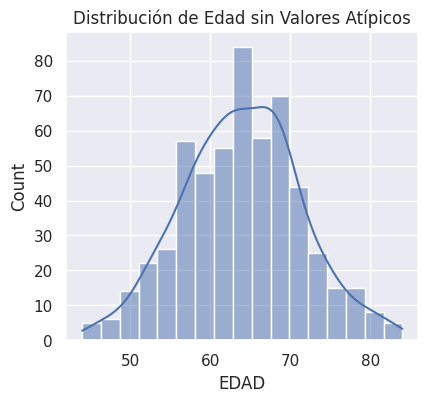

In [12]:
#Grafico la columna 'EDAD' para verificar que los valores atípicos se han eliminado.
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(edad_sin_atipicos['EDAD'], kde=True)
plt.title('Distribución de Edad sin Valores Atípicos')


Para las variables categóricas, realizar una visualización adecuada para observar las frecuencias de cada categoría. ¿Observa alguna anomalía, problema de formato en alguna variable?

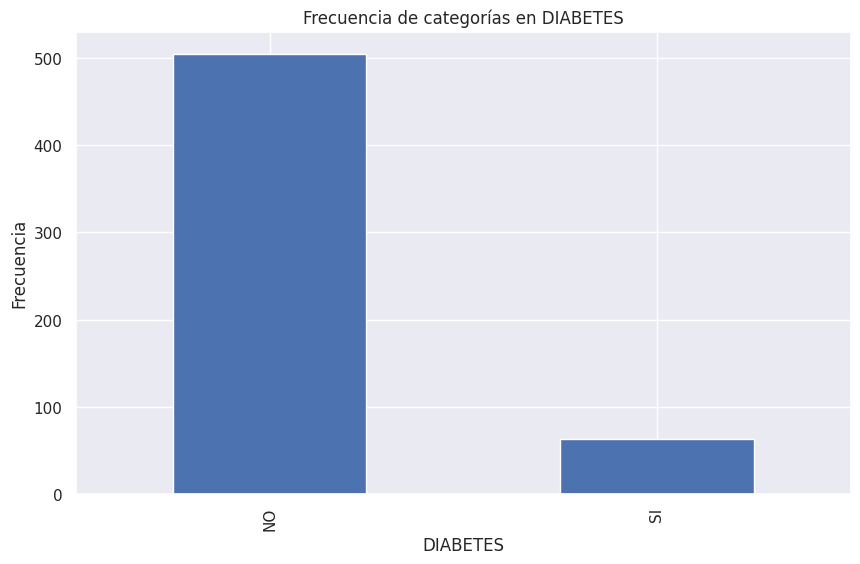

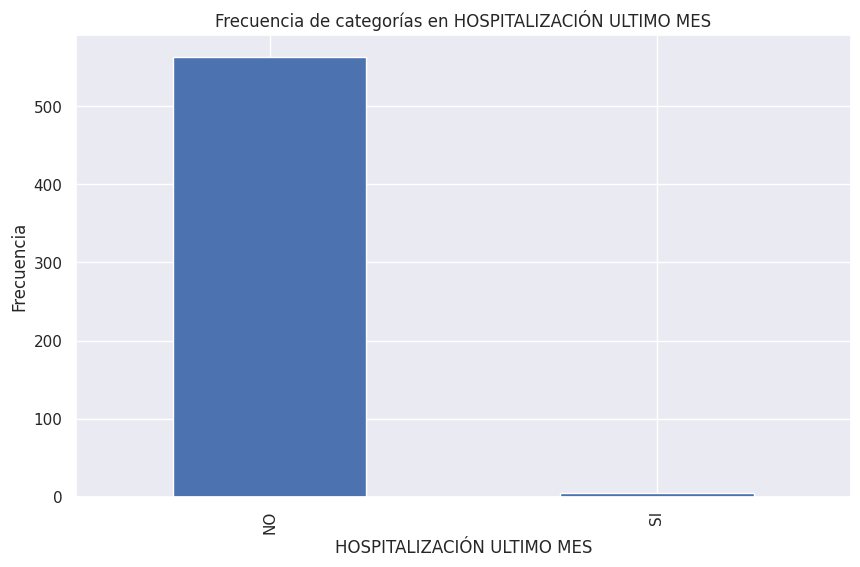

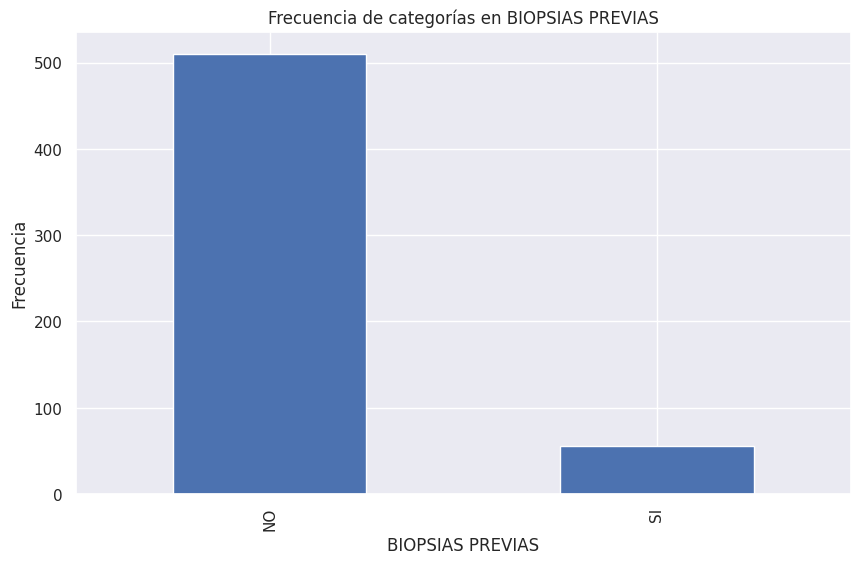

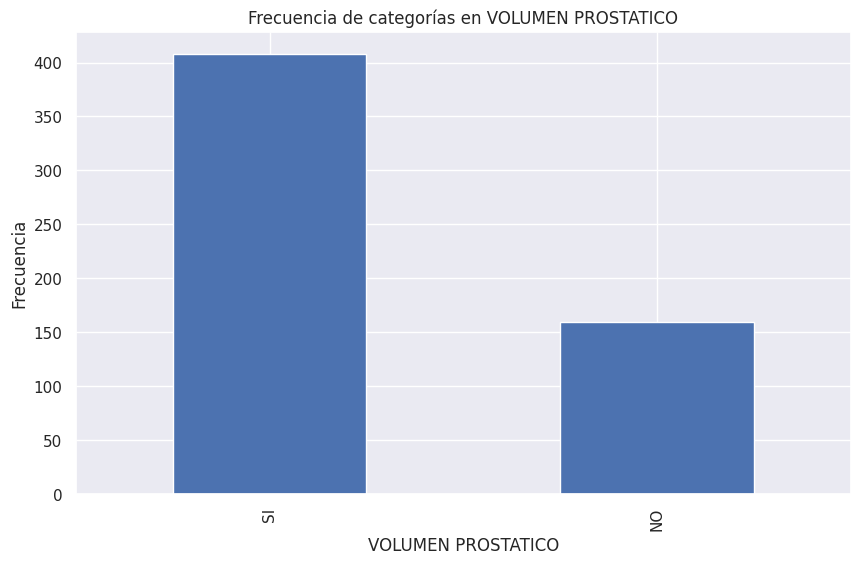

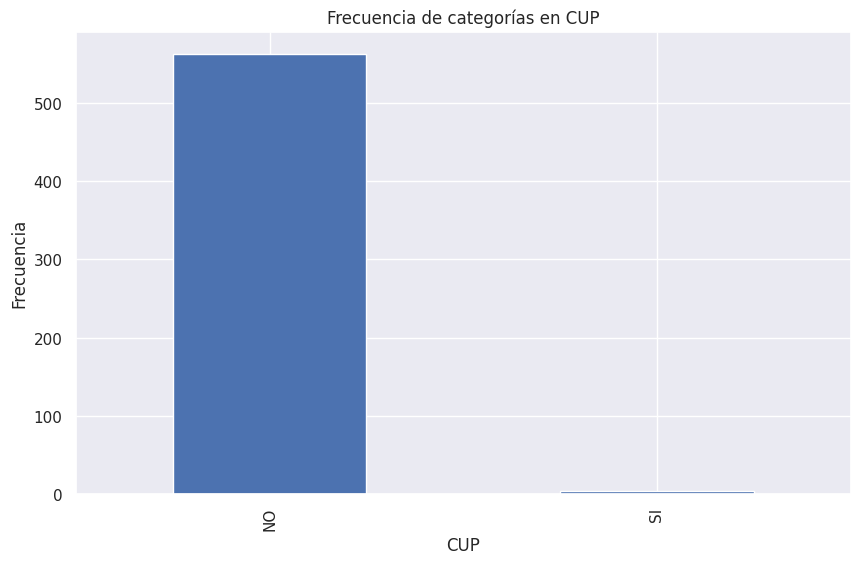

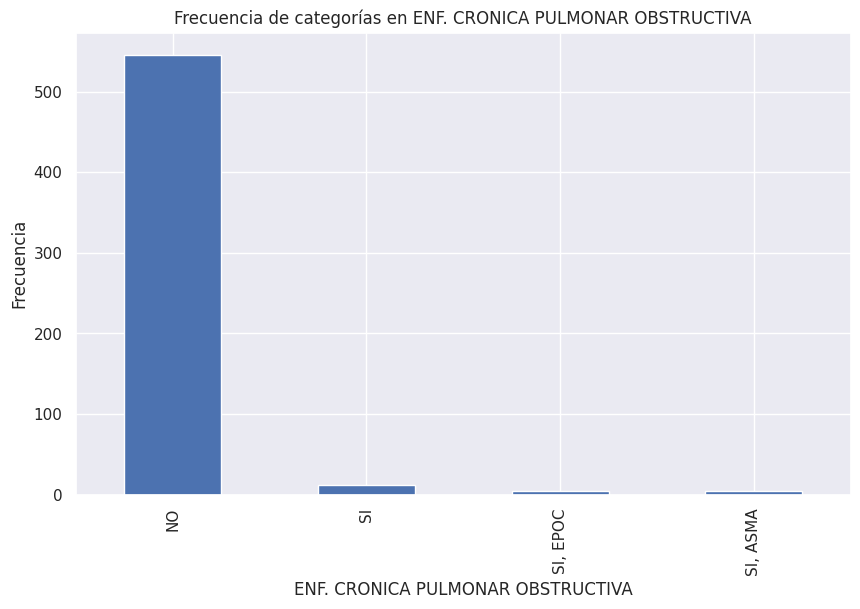

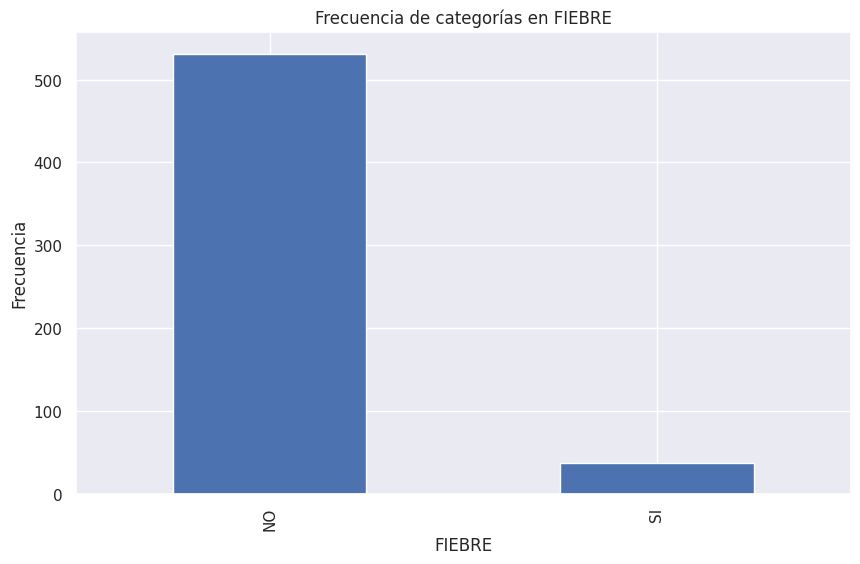

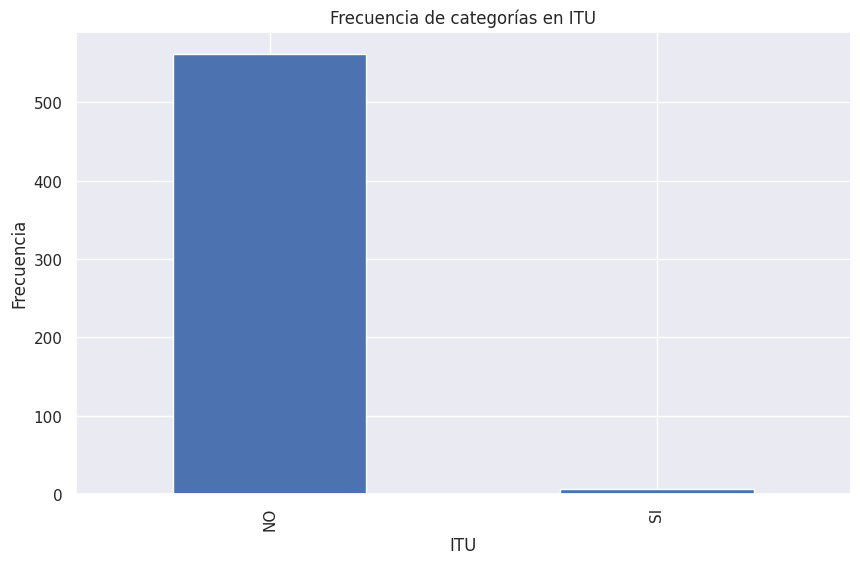

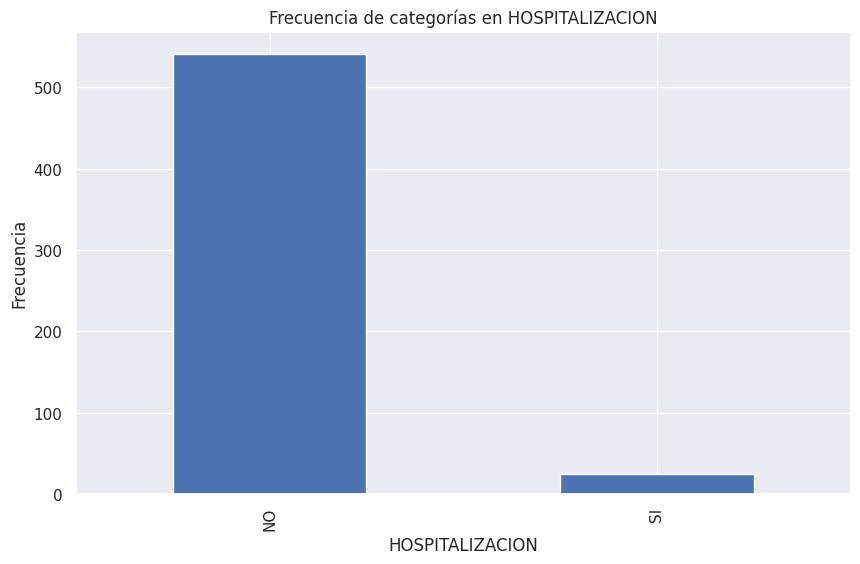

In [13]:

variables_categoricas = ['DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO',
                         'CUP', 'ENF. CRONICA PULMONAR OBSTRUCTIVA',
                         'FIEBRE', 'ITU', 'HOSPITALIZACION']
# Gráficos de barras para cada variable categórica
for variable in variables_categoricas:
    plt.figure(figsize=(10, 6))
    datos[variable].value_counts().plot(kind='bar')
    plt.title(f'Frecuencia de categorías en {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.show()


Revisen la cantidad de nulos que tiene cada columna. ¿Es necesario eliminar alguna columna? ¿Se imputarán valores? En caso de imputar, explicar en cada caso, por medio de qué estrategia lo harán. 

In [14]:
# He hecho una función para una inspección de datos e identificar valores nulos en todas las columnas.
# Esto nos ayudará a tomar decisiones adicionales sobre cómo manejar los valores faltantes.

def data_inspeccion(variables_categoricas):
    print(f'Shape: {variables_categoricas.shape}')
    print(f'\nDatos faltantes:')
    for columna in variables_categoricas.columns:
        cantidad_nulos = datos[columna].isnull().sum()
        print(f'{columna}: {cantidad_nulos} valores nulos')

data_inspeccion(datos)


Shape: (570, 19)

Datos faltantes:
EDAD: 2 valores nulos
DIABETES: 2 valores nulos
HOSPITALIZACIÓN ULTIMO MES: 2 valores nulos
PSA: 6 valores nulos
BIOPSIAS PREVIAS: 4 valores nulos
VOLUMEN PROSTATICO: 3 valores nulos
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS: 2 valores nulos
CUP: 3 valores nulos
ENF. CRONICA PULMONAR OBSTRUCTIVA: 4 valores nulos
BIOPSIA: 2 valores nulos
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA: 2 valores nulos
FIEBRE: 2 valores nulos
ITU: 2 valores nulos
TIPO DE CULTIVO: 2 valores nulos
AGENTE AISLADO: 19 valores nulos
PATRON DE RESISTENCIA: 2 valores nulos
HOSPITALIZACION: 5 valores nulos
DIAS HOSPITALIZACION MQ: 2 valores nulos
DIAS HOSPITALIZACIÓN UPC: 2 valores nulos


In [15]:
# Elimina las filas con valores nulos en todo el DataFrame
datos.dropna(inplace=True)

# Visualiza los valores nulos después de eliminar
data_inspeccion(datos)


Shape: (541, 19)

Datos faltantes:
EDAD: 0 valores nulos
DIABETES: 0 valores nulos
HOSPITALIZACIÓN ULTIMO MES: 0 valores nulos
PSA: 0 valores nulos
BIOPSIAS PREVIAS: 0 valores nulos
VOLUMEN PROSTATICO: 0 valores nulos
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS: 0 valores nulos
CUP: 0 valores nulos
ENF. CRONICA PULMONAR OBSTRUCTIVA: 0 valores nulos
BIOPSIA: 0 valores nulos
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA: 0 valores nulos
FIEBRE: 0 valores nulos
ITU: 0 valores nulos
TIPO DE CULTIVO: 0 valores nulos
AGENTE AISLADO: 0 valores nulos
PATRON DE RESISTENCIA: 0 valores nulos
HOSPITALIZACION: 0 valores nulos
DIAS HOSPITALIZACION MQ: 0 valores nulos
DIAS HOSPITALIZACIÓN UPC: 0 valores nulos


In [16]:
datos.shape

(541, 19)

Para el caso de las variables numéricas, ¿Es necesario normalizar?

Aunque no es estrictamente necesario normalizar la columna 'EDAD', podría ser beneficioso para la consistencia del análisis. Por otro lado, normalizar 'PSA' sería recomendable debido a su amplia escala.<br>
La columna 'EDAD' tiene valores en un rango relativamente pequeño (desde 39 hasta 151) y una desviación estándar moderada. Pues parece tener una escala extremadamente dispar, por lo que normalizarla podría no ser estrictamente necesario, pero aún así podría ser beneficioso si es que utilizamos un  algoritmo sensible a la escala.<br>
La columna 'PSA' tiene una escala mucho más amplia, con valores desde 0.6 hasta 100 y una desviación estándar considerable. Dada la diferencia en la escala de esta columna, normalizarla podría ser útil, especialmente si estamos planeando utilizar un algoritmo sensible a la escala, como por ejemplo un (SVM).

In [17]:
#Este código creará un objeto StandardScaler que se utilizará para normalizar las columnas 'EDAD' y 'PSA'. 
# He usado la función StandardScaler de Scikit-Learn.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columnas_numericas = ['EDAD', 'PSA']

datos[columnas_numericas] = scaler.fit_transform(datos[columnas_numericas])

print(datos[columnas_numericas].describe())

               EDAD           PSA
count  5.410000e+02  5.410000e+02
mean  -1.379057e-16  2.298428e-17
std    1.000925e+00  1.000925e+00
min   -2.652224e+00 -8.028793e-01
25%   -5.201984e-01 -4.890402e-01
50%    1.280792e-02 -3.383974e-01
75%    5.458142e-01  1.009773e-01
max    9.287118e+00  5.436242e+00


* He visualizado la 'Normalizacion' que he creado para las columnas 'EDAD','PSA' para verificar visualmente si siguen una distribución normal estándar.

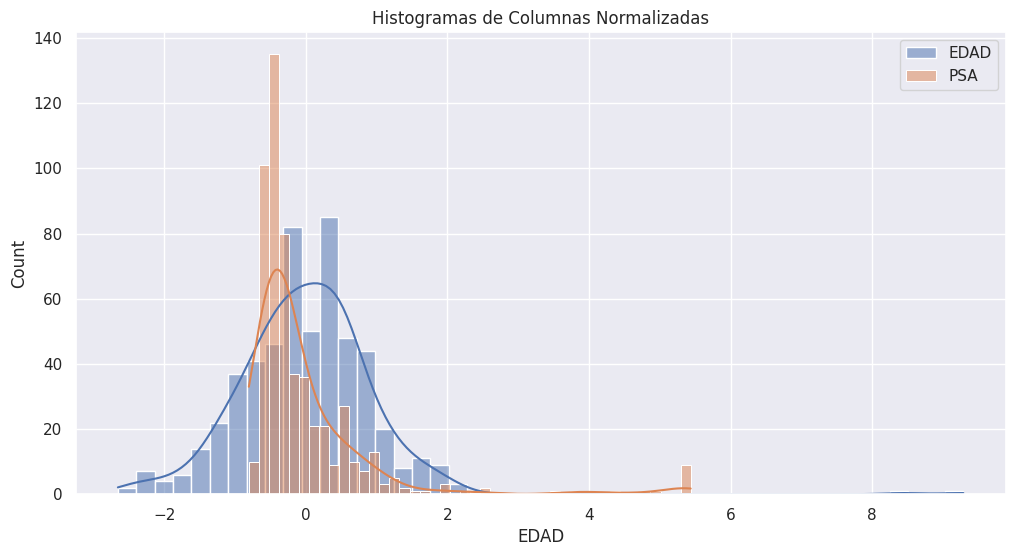

In [18]:
plt.figure(figsize=(12, 6))
for col in columnas_numericas:
    sns.histplot(datos[col], kde=True, label=col)
plt.legend()
plt.title('Histogramas de Columnas Normalizadas')
plt.show()

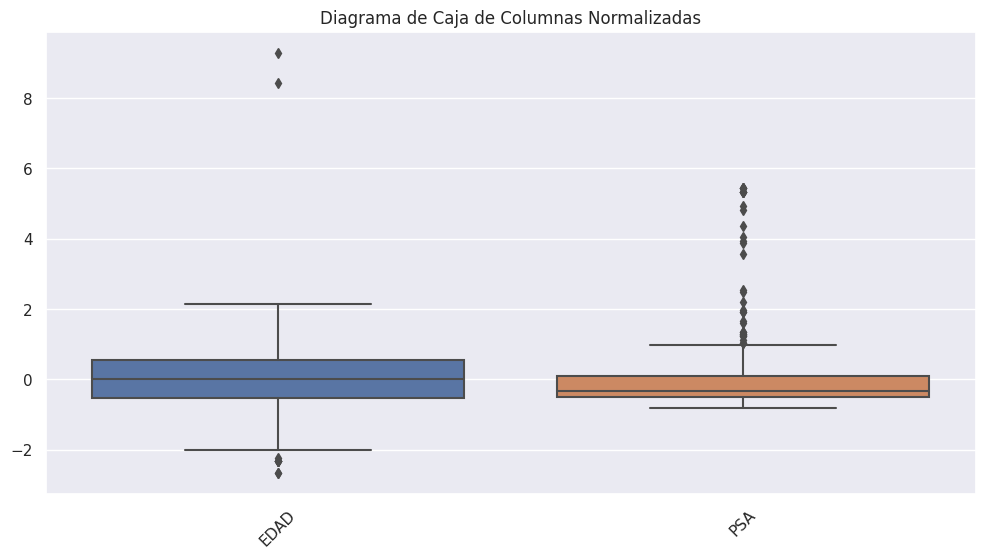

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=datos[columnas_numericas], orient="v")
plt.title('Diagrama de Caja de Columnas Normalizadas')
plt.xticks(rotation=45)
plt.show()


Realice las transformaciones que considere pertinentes con el fin de preparar los datos para un modelo de clasificación de un paciente con desenlace en Hospitalización. 

*  Al codificar las categorías de esta manera, se convierten en características binarias que podran ser fácilmente interpretadas por algoritmos de aprendizaje automático. En este caso, 'NO' se asigna como 0, y 'SI' se asigna como 1, lo que permite representar de manera efectiva la presencia o ausencia de ciertas condiciones o características.

In [20]:
datos['DIABETES'] = datos['DIABETES'].map({'NO':0,'SI':1})
datos['HOSPITALIZACIÓN ULTIMO MES'] = datos['HOSPITALIZACIÓN ULTIMO MES'].map({'NO':0,'SI':1})
datos['BIOPSIAS PREVIAS'] = datos['BIOPSIAS PREVIAS'].map({'NO':0,'SI':1})
datos['VOLUMEN PROSTATICO'] = datos['VOLUMEN PROSTATICO'].map({'NO':0,'SI':1})
datos['CUP'] = datos['CUP'].map({'NO':0,'SI':1})
datos['ENF. CRONICA PULMONAR OBSTRUCTIVA'] = datos['ENF. CRONICA PULMONAR OBSTRUCTIVA'].map({'NO':0,'SI':1})
datos['FIEBRE'] = datos['FIEBRE'].map({'NO':0,'SI':1})
datos['ITU'] = datos['ITU'].map({'NO':0,'SI':1})
datos['HOSPITALIZACION'] = datos['HOSPITALIZACION'].map({'NO':0,'SI':1})


datos.head()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,-1.159806,0,0,-0.589469,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,0,0.0,NEG,1,1,0,NO,NO,NO,1,2.0,0.0
1,-0.840002,0,0,-0.357228,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,0,0.0,NEG,1,1,0,NO,NO,NO,1,5.0,0.0
2,-0.733401,0,0,0.979727,1,1,FLUOROQUINOLONA_AMINOGLICOSIDO,0,0.0,NEG,1,1,0,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",1,4.0,3.0
3,-0.840002,0,0,-0.401165,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,0,0.0,NEG,1,1,0,NO,NO,NO,1,5.0,0.0
4,-0.946603,0,0,0.979727,1,1,FLUOROQUINOLONA_AMINOGLICOSIDO,0,0.0,NEG,1,1,0,HEMOCULTIVO,E.COLI,NO,1,4.0,3.0


In [21]:
# Selecciona solo las columnas mapeadas con valores 0 y 1
columnas_seleccionadas = ['DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO', 'CUP', 'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'FIEBRE', 'ITU', 'HOSPITALIZACION']
datos_seleccionados = datos[columnas_seleccionadas]

# Muestra las primeras filas del DataFrame
print(datos_seleccionados.head())


   DIABETES  HOSPITALIZACIÓN ULTIMO MES  BIOPSIAS PREVIAS  VOLUMEN PROSTATICO  \
0         0                           0                 0                   1   
1         0                           0                 0                   1   
2         0                           0                 1                   1   
3         0                           0                 0                   1   
4         0                           0                 1                   1   

   CUP  ENF. CRONICA PULMONAR OBSTRUCTIVA  FIEBRE  ITU  HOSPITALIZACION  
0    0                                0.0       1    0                1  
1    0                                0.0       1    0                1  
2    0                                0.0       1    0                1  
3    0                                0.0       1    0                1  
4    0                                0.0       1    0                1  


Realice una matriz de correlación con el fin de determinar si hay variables redundantes. En caso de encontrar altas correlaciones, ¿Tomará alguna acción?

In [22]:
matriz_correlacion = datos_seleccionados.corr()

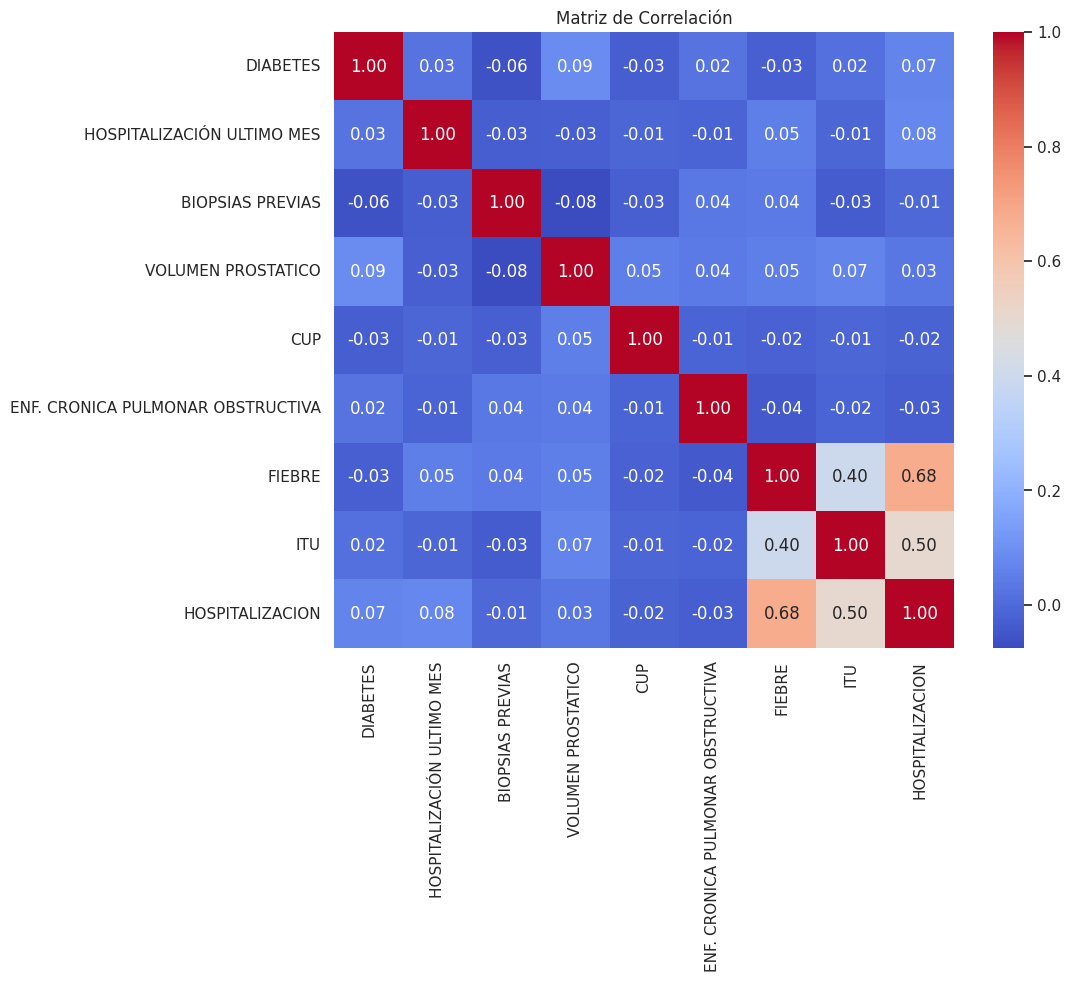

In [23]:
# He creado  un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

Exporte la base de datos preparada en un archivo .csv para el modelamiento. 

In [24]:
datos_seleccionados.to_csv('BBDD_Hospitalización.csv')